# Data Feature Engineering
Making New / Combining features / removing old features.
- Saving these Different combinations as Dataframes in "data" folder


The data can be found here: https://www.kaggle.com/yasserh/breast-cancer-dataset

Documentation can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

You can also find the github repo here: https://github.com/brianl2/BrCancer_LHL_final
Note: 
Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

   a) radius (mean of distances from center to points on the perimeter)
   b) texture (standard deviation of gray-scale values)
   c) perimeter
   d) area
   e) smoothness (local variation in radius lengths)
   f) compactness (perimeter^2 / area - 1.0)
   g) concavity (severity of concave portions of the contour)
   h) concave points (number of concave portions of the contour)
   i) symmetry 
   j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  

For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Worst is the mean of the largest values 

In [1]:
# importing modules
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# read in the cleaned dataframe 
brca = pd.read_csv('data/brca.csv')

In [3]:
# print dataframe
brca.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## We saw previously in 1.1 Data Exploration there was a lot of correlation. 
- To deal with multicolinearity, we can remove features that are highly correlated 
- This function below will help us determine which columns are highly correlated in the dataset.

In [4]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [5]:
# Lets see how many there are that are above 0.75
correlated = correlation(brca, 0.75)
print(len(correlated))
# Names of columns to remove
print(correlated)

18
{'concave points_se', 'perimeter_mean', 'area_worst', 'concavity_worst', 'concave points_worst', 'area_mean', 'compactness_worst', 'concavity_se', 'fractal_dimension_worst', 'concave points_mean', 'smoothness_worst', 'radius_worst', 'texture_worst', 'perimeter_se', 'area_se', 'concavity_mean', 'fractal_dimension_se', 'perimeter_worst'}


In [6]:
brca = brca.drop(columns = ['area_mean', 'concavity_se', 'concave points_se', 'texture_worst', 'perimeter_mean', 'perimeter_worst', 'compactness_worst', 'concavity_worst', 'fractal_dimension_worst', 'perimeter_se', 'concave points_worst', 'fractal_dimension_se', 'area_se', 'smoothness_worst', 'concave points_mean', 'concavity_mean', 'radius_worst', 'area_worst'])
brca.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,0,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,0,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,0,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,0,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364


In [7]:
# There are some outliers which , as we saw in Data Exploration, we can make a dataset without outliers to see how the model performs. 
outliers = brca.copy()

for i in [i for i in outliers.columns]:
    if outliers[i].nunique()>=12:
        Q1 = outliers[i].quantile(0.15)
        Q3 = outliers[i].quantile(0.85)
        IQR = Q3 - Q1
        outliers = outliers[outliers[i] <= (Q3+(1.5*IQR))]
        outliers = outliers[outliers[i] >= (Q1-(1.5*IQR))]
outliers = outliers.reset_index(drop=True)

print(f'Before removal of outliers, The dataset had {brca.shape[0]} samples.')
print(f'After removal of outliers, The dataset now has {outliers.shape[0]} samples.')

Before removal of outliers, The dataset had 569 samples.
After removal of outliers, The dataset now has 533 samples.


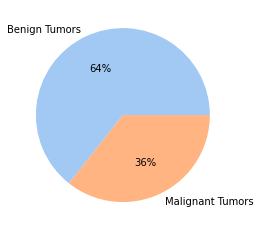

In [56]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
data = outliers['diagnosis'].value_counts()
labels =['Benign Tumors','Malignant Tumors']
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Just about the same ratio (64% to 36% before removal of outliers) -> It seems like dropping the outliers still might require oversampling or undersampling techniques

In [8]:
# Dataset without outliers - Save in data
outliers.to_csv('data/outliersrm.csv', index = False)

In [71]:
# creating a dataframe with an average of the mean + worst as a new feature
# Must use the original dataset
# defining a function
def create_average(column1, column2, columnname):
    brca[columnname] = (brca2[column1] + brca2[column2]) / 2 
    
def create_average_out(column1, column2, columnname):
    outliers[columnname] = (outliers[column1] + outliers[column2]) / 2 

In [63]:
# Original dataset
brca2 = pd.read_csv('brca.csv')

In [67]:
# get list of names
features = [i for i in brca2.columns.values if i not in ['diagnosis','id']]
mean = features[0:10]
worst = features[20:30]
names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave', 'symmetry', 'fractal_dimension']

In [72]:
# Create new columns for the average between worst and mean
for (a, b, c) in zip(mean, worst, names):
     create_average(a, b, c)

In [73]:
#checking DF (averaged out )
print(brca2.head(5))
brca2.to_csv('data/averaged_brca.csv', index = False)

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

# Dealing with Multicolinearity continued
- We have already removed features that are highly correlated - Lets see if there is anything else
- Multicollinearity makes prediction less accurate. 
- Implementing VIF (Variance inflator factor)
    - Higher VIF, more correlated (less than 10 is acceptable) 

In [17]:
# features of interest to calculate VIF
x = outliers.iloc[:,1:]

In [18]:
# save the VIF values in a column for easy viewing 
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [19]:
vif_data

,feature,VIF
0,radius_mean,42.738740
1,texture_mean,35.886720
2,smoothness_mean,174.495463
3,compactness_mean,32.693219
4,symmetry_mean,143.600240
5,fractal_dimension_mean,159.169984
6,radius_se,10.639302
7,texture_se,14.628946
8,smoothness_se,18.451954
9,compactness_se,15.975644


- There is still multicolinearity. Maybe we can reduce features further?
RFECV to reduce features. 

In [21]:
# Prepping the data for RFECV
# import features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
# differentiate columns and target
X = outliers.loc[:, outliers.columns != 'diagnosis']
y = outliers.loc[:, outliers.columns == 'diagnosis']
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
# Scale data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
# Reshape data
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()


In [22]:
# Trying with SVM
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)

In [23]:
# Ranking the features selected. 
names = pd.DataFrame(X.columns)
selector.support_#The mask of selected features.
selector.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(selector.ranking_) #Make it into data frame
rankings

#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                   Feature  Rank
0              radius_mean     1
1             texture_mean     1
4            symmetry_mean     1
5   fractal_dimension_mean     1
6                radius_se     1
8            smoothness_se     1
10             symmetry_se     1
11          symmetry_worst     1


8

In [25]:
# Gives me 8 for SVC, lets try Logistic regression
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
selector2 = RFECV(estimator, step=1, cv=5)
selector2 = selector.fit(X_train, y_train)

In [27]:
names = pd.DataFrame(X.columns)
selector2.support_#The mask of selected features.
selector2.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(selector.ranking_) #Make it into data frame
rankings

#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important2 = ranked.loc[ranked['Rank'] ==1] 
print(most_important2)

most_important2['Rank'].count()

                   Feature  Rank
0              radius_mean     1
1             texture_mean     1
4            symmetry_mean     1
5   fractal_dimension_mean     1
6                radius_se     1
8            smoothness_se     1
10             symmetry_se     1
11          symmetry_worst     1


8

In [28]:
finalist = list(most_important2['Feature'].values)

RFE using both methods (SVC and Logistic regression) give me the same 9 features. 
# So We will use these 9 features in the final dataset. 
- Create final dataset:

In [29]:
outliers.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,0,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,0,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,0,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364
4,0,12.45,15.70,0.12780,0.17000,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.02165,0.3985


In [30]:
# Saving the Dataframes into variables, and then into CSVs
X = outliers[finalist]
y = pd.DataFrame(outliers['diagnosis'])

In [31]:
X.to_csv('data/final_data.csv', index = False)
y.to_csv('data/final_target.csv', index = False)